In [1]:
import train as train
import generate
import eval
from modules.config import read_config
import modules.plots as plots
import torch
import numpy as np
import os

In [2]:
BASE_DIR = "./experiments/pipeline-test"
PROFILE = "sin-10x"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

In [4]:
config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]

In [5]:
GENERATE = True
TRAIN = True
EVAL = True

IS_ONE_DIM = False

====== Generating profile sin-1x-10k ======


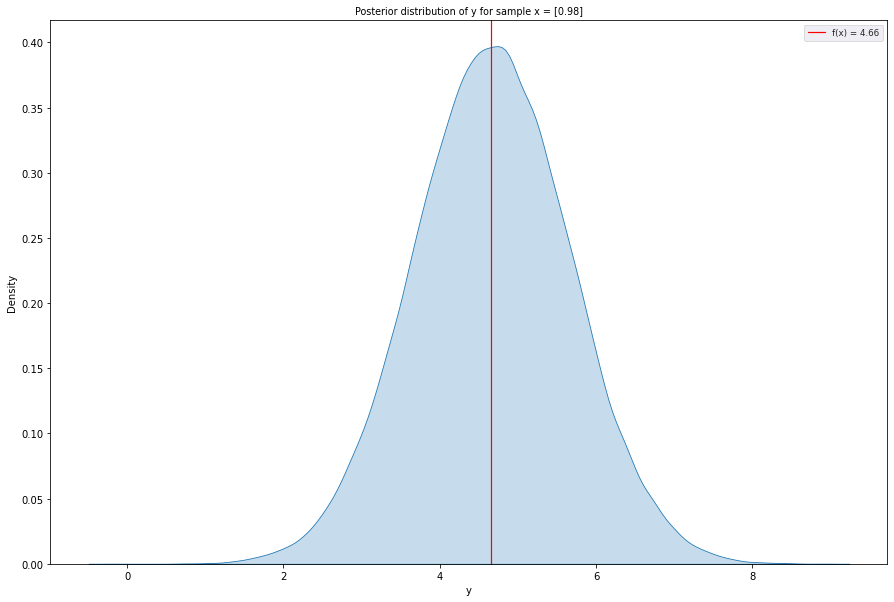

In [6]:
if GENERATE:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

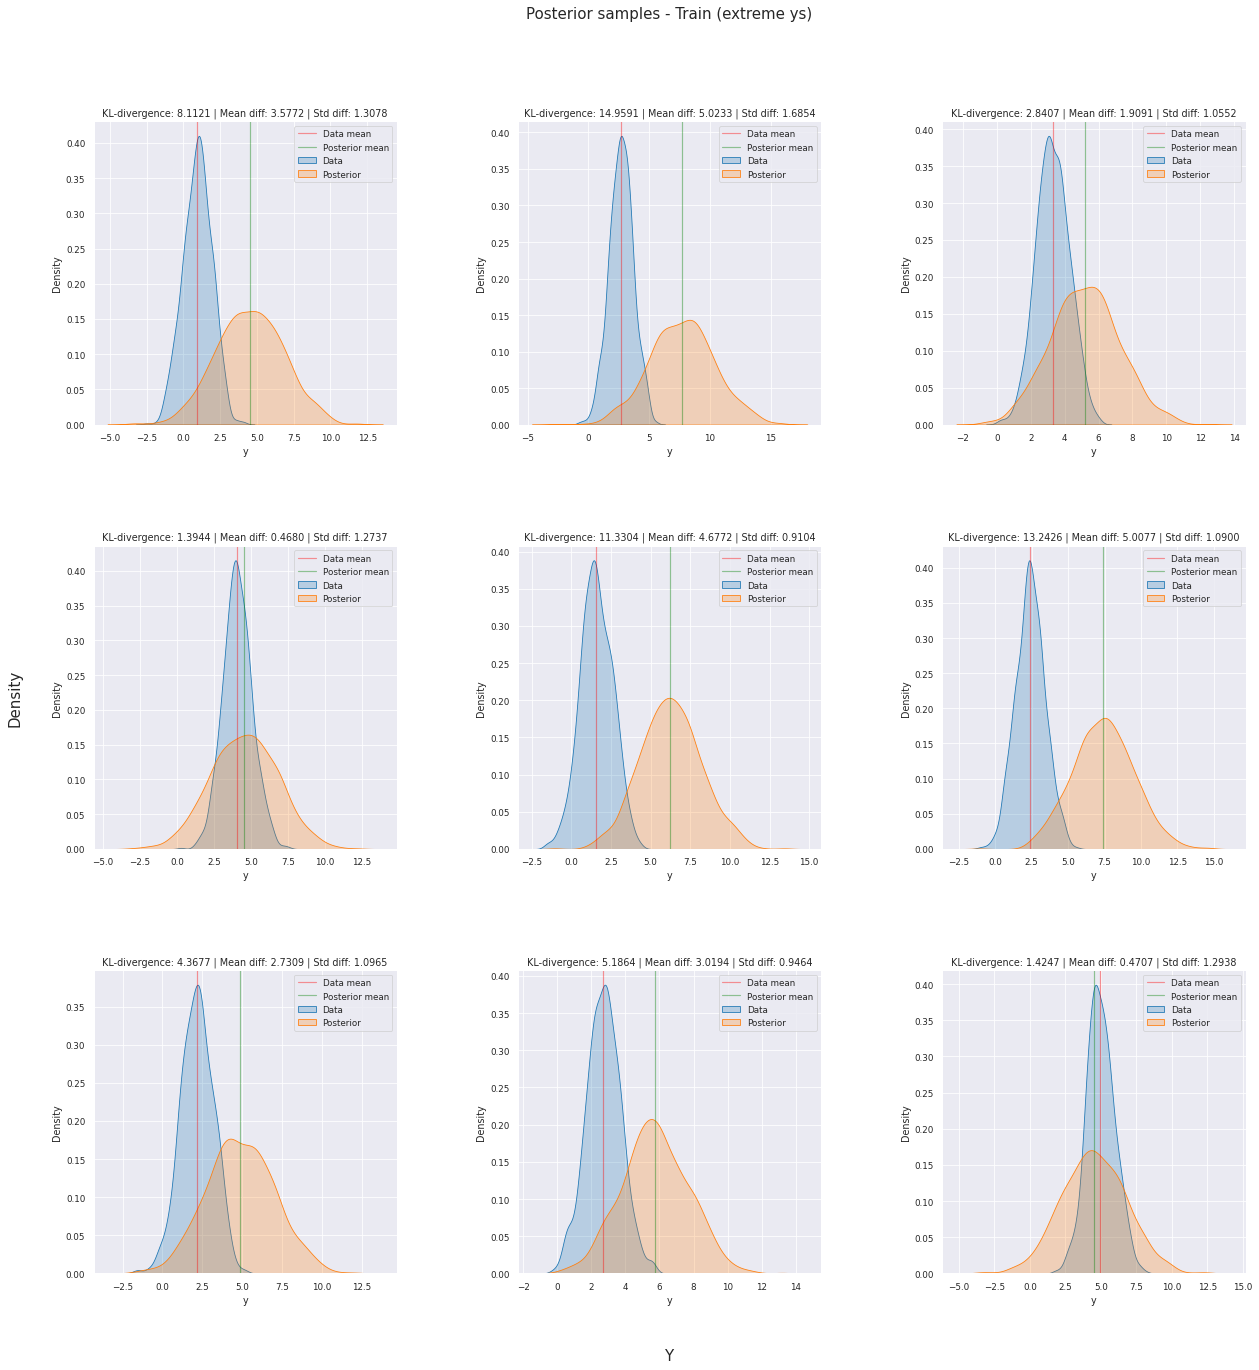

Using device: cpu
===== Training profile sin-1x =====


Epoch:   0%|          | 0/500 [00:00<?, ?it/s]

Training finished in 0:03:41.156271 seconds
Saved model and parameters to ./experiments/pipeline-test/models/sin-1x


In [8]:
if TRAIN:
    if not os.path.exists(f"{BASE_DIR}/models"):
        os.mkdir(f"{BASE_DIR}/models")

    train.train(config, dataset_config, f"{BASE_DIR}")

In [ ]:
if EVAL:
    if not os.path.exists(f"{BASE_DIR}/results"):
                os.mkdir(f"{BASE_DIR}/results")
                
    eval.eval(config, dataset_config, f"{BASE_DIR}")

Loaded model and parameters from ./experiments/pipeline-test/models/sin-10x
using device: cpu
====== evaluating profile sin-10x ======


In [ ]:
# Load test samples from eval
data_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/data_samples.csv", delimiter=",")
pred_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/predictive_samples.csv", delimiter=",")

# Load in domain samples
data_in_domain_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/data_in_domain_samples.csv", delimiter=",")
pred_in_domain_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/predictive_in_domain_samples.csv", delimiter=",")

# Load out of domain samples
data_out_domain_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/data_out_domain_samples.csv", delimiter=",")
pred_out_domain_samples = np.genfromtxt(f"{BASE_DIR}/results/{NAME}/samples/predictive_out_domain_samples.csv", delimiter=",")
pred_samples.shape

(10000, 1000)

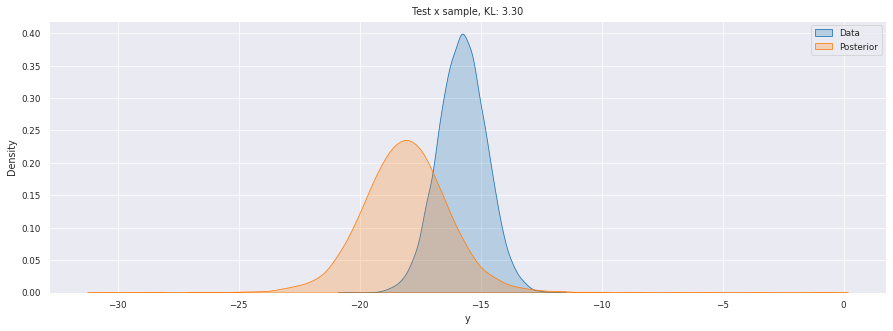

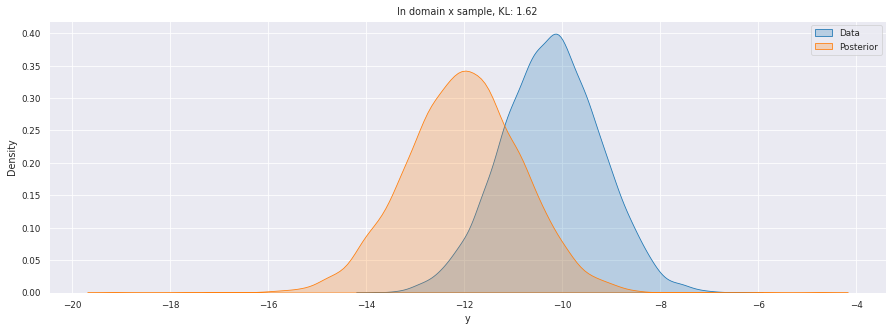

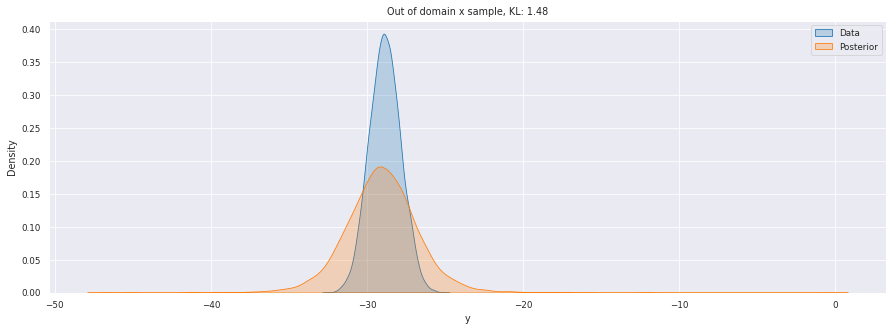

In [ ]:
from modules.metrics import KL_divergance_normal
i = 2

kl1 = KL_divergance_normal(pred_samples[:, i], data_samples[:, i])
kl2 = KL_divergance_normal(pred_in_domain_samples[:, i], data_in_domain_samples[:, i])
kl3 = KL_divergance_normal(pred_out_domain_samples[:, i], data_out_domain_samples[:, i])
plots.plot_comparison(pred_samples[:, i], data_samples[:, i], figsize=(15, 5), title=f"Test x sample, KL: {kl1:.2f}")
plots.plot_comparison(pred_in_domain_samples[:, i], data_in_domain_samples[:, i], figsize=(15, 5), title=f"In domain x sample, KL: {kl2:.2f}")
plots.plot_comparison(pred_out_domain_samples[:, i], data_out_domain_samples[:, i], figsize=(15, 5), title=f"Out of domain x sample, KL: {kl3:.2f}")